<a href="https://colab.research.google.com/github/salilathalye/cwa-dphitech-challenge-58/blob/master/dphi_challenge_58_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Sprint #22: Concrete Crack Image Classification
Build a model to detect the cracked concrete

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:
FILE_ID = '1ZKrbsUlrsTgJSlFMz2EGmTINFCQ8PcjO'
DEST_PATH = './concrete_crack_data.zip'

In [ ]:
gdd.download_file_from_google_drive(file_id=FILE_ID,
dest_path=DEST_PATH,
unzip=True)

Unzipping...Done.


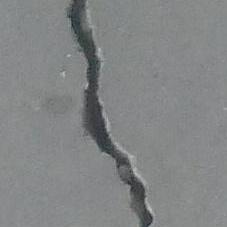

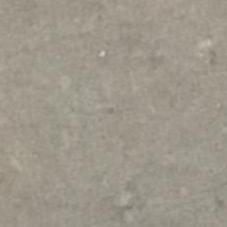

In [ ]:
from IPython.display import Image, display

listOfImageNames = ['/content/concrete_cracked_images/train/Positive/00001.jpg',
                    '/content/concrete_cracked_images/train/Negative/00697.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [ ]:

data=[]
IMG_SIZE=100

def create_data():
  for item in ['Negative','Positive']:
    path='/content/concrete_cracked_images/train/'+item+"/"

    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        new_img_array = new_img_array / 255
        if item == 'Negative':
          data.append([new_img_array, 0])
        else:
          data.append([new_img_array, 1])
      except Exception as e:
        pass


create_data()

In [ ]:
len(data)

28718

In [ ]:
data[0]

[array([[0.74901961, 0.73333333, 0.72156863, ..., 0.76862745, 0.77647059,
         0.77254902],
        [0.74901961, 0.71764706, 0.70980392, ..., 0.77647059, 0.76078431,
         0.75686275],
        [0.73333333, 0.70980392, 0.70196078, ..., 0.76078431, 0.74509804,
         0.74901961],
        ...,
        [0.74901961, 0.72941176, 0.7372549 , ..., 0.7372549 , 0.72156863,
         0.69411765],
        [0.72941176, 0.72941176, 0.76078431, ..., 0.7372549 , 0.71764706,
         0.72156863],
        [0.70980392, 0.73333333, 0.85098039, ..., 0.7254902 , 0.72941176,
         0.7254902 ]]), 0]

In [ ]:
np.random.shuffle(data)


In [ ]:
X = []
y = []

for example in data:
  X.append(example[0])
  y.append(example[1])

X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:

model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
     tf.keras.layers.Dense(IMG_SIZE, activation='relu'),
     tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
1257/1257 [==============================] - 5s 3ms/step - loss: 0.6893 - accuracy: 0.6413
Epoch 2/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3983 - accuracy: 0.8249
Epoch 3/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3619 - accuracy: 0.8374
Epoch 4/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3391 - accuracy: 0.8572
Epoch 5/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3178 - accuracy: 0.8642
Epoch 6/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2928 - accuracy: 0.8823
Epoch 7/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.2883 - accuracy: 0.8828
Epoch 8/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.2828 - accuracy: 0.8846
Epoch 9/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3040 - accuracy: 0.8773
Epoch 10/10
1257/1257 [==============================] - 3s 3ms/step - loss: 0.285

In [ ]:
model.evaluate(X_val, y_val)

270/270 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.8987


[0.2565062940120697, 0.898676872253418]

In [ ]:
test_images = pd.read_csv("/content/concrete_cracked_images/Testing_set_concrete_crack.csv")
print(test_images.columns)


Index(['filename'], dtype='object')


In [ ]:
test_data = []
for i, image in enumerate(test_images['filename']):
  try:
    image_path = os.path.join('/content/concrete_cracked_images/test',image)
    image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    resized_image_array = resized_image_array / 255
    test_data.append(resized_image_array)
  except Exception as e:
    pass

In [ ]:
len(test_data)

11282

In [ ]:
test_data = np.array(test_data)

In [ ]:
test_data[2]

array([[0.61176471, 0.64705882, 0.63529412, ..., 0.6       , 0.63137255,
        0.61568627],
       [0.60784314, 0.63529412, 0.62745098, ..., 0.59607843, 0.62352941,
        0.62745098],
       [0.61176471, 0.63137255, 0.62745098, ..., 0.61176471, 0.62745098,
        0.63921569],
       ...,
       [0.63921569, 0.6745098 , 0.65490196, ..., 0.61960784, 0.62745098,
        0.61568627],
       [0.59215686, 0.6       , 0.60784314, ..., 0.63137255, 0.63137255,
        0.60392157],
       [0.59215686, 0.6       , 0.59607843, ..., 0.6       , 0.62352941,
        0.61960784]])

In [ ]:
predictions = model.predict(test_data)

In [ ]:
predictions[7]

array([0.04461096], dtype=float32)

In [ ]:
THRESHOLD=0.5
predictions_labeled = []
for p in predictions:
  if p < THRESHOLD:
    predictions_labeled.append('Negative')
  else:
    predictions_labeled.append('Positive')



In [ ]:
submission = pd.DataFrame({'prediction': predictions_labeled})

In [ ]:
submission.tail()

,prediction
11277,Negative
11278,Negative
11279,Negative
11280,Positive
11281,Negative


In [ ]:
submission.to_csv("submission.csv", index=False)